# **Chapter 3**
This notebook walkthrough the cleaning and exploring process of our arabic tweets dataset

In [3]:
!pip install python-bidi
!pip install arabic_reshaper
!pip install wordcloud
!pip install emoji
!pip install nltk
!pip install tashaphyne
# !pip install gensim

     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=1ecf2df7365d24179dac7d03708d6ba84b7fbbd037ea3d491bb98173366ce940
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 245kB 8.1MB/s 
     |████████████████████████████████| 112kB 19.7MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.7-cp36-none-any.whl size=108603 sha256=02af9ca569b25e963fbb444d03163fbc792ae67e1807235a5d9152f32c38ec47
  Stored in directory: /root/.cache/pip/wheels/c6/50/b1/4df7f705f36e91360ab04416dbf1017084698d30a7a3645b5e
Successfully built pyarabic


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from IPython.display import display

import utils


# FONT_PATH = os.environ.get("FONT_PATH", "/Library/Fonts/Times New Roman.ttf")
# path = './labeld_dataset/'

import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Cleaning and EDA

In [0]:
# sys.path.insert(0, path)

In [0]:
bolivard = pd.read_csv('/content/drive/My Drive/Colab Notebooks/grad_pr/bolivard.csv', header=0)
winter = pd.read_csv('/content/drive/My Drive/Colab Notebooks/grad_pr/winter_wounder_land.csv', header=None)
shm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/grad_pr/labeled shm3.csv', header=0)

In [42]:
display(shm.loc[:, shm.columns != 'user-name'].head(n=3))
display(bolivard.head(n=3))
display(winter.head(n=3))

,Unnamed: 0,date,label,tweet,loca,fv_count,rt-count,Event name
0,31,2019-11-06 15:43:30,2.0,ابو ناصر طلبتك ...المفروض تكون ليلة لك كليلة ع...,جدة,0.0,0.0,SHM
1,32,2019-11-06 15:43:07,2.0,ليلة سهم على اي قناه عرضوها امس؟,NaN,0.0,0.0,SHM
2,108,2019-11-06 15:01:00,2.0,#ليلة_سهم\nالليلة بشكل عام جميلة .. بس الكراسي...,الرياض,0.0,0.0,SHM


,date,label,text,event
0,2019-10-19 15:06:03,0,#بوليفارد_الرياض وصار للعوائل فقط😂😂,carnival_bolivard
1,2019-10-19 15:05:17,1,@RiyadhSeason ودنا #بوليفارد_الرياض يكون متواج...,carnival_bolivard
2,2019-10-19 15:02:51,1,أغلبنا تضايق من زحمة #بوليفارد_الرياض والمناظر...,carnival_bolivard


,0,1,2
0,2019-10-26 20:14:04,اللعبة هذي في #ونتر_وندرلاند اليوم\n\nاخيرا ج...,NaN
1,2019-10-26 20:13:28,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,1
2,2019-10-26 20:12:23,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,2


In [43]:
winter.columns = ['date', 'text', 'label']
print(shm.columns)

Index(['Unnamed: 0', 'date', 'label', 'tweet', 'user-name', 'loca', 'fv_count',
       'rt-count', 'Event name'],
      dtype='object')


In [0]:

shm.drop('Unnamed: 0', inplace=True, axis=1)
shm.rename(columns={'tweet': 'text'}, inplace=True)


In [45]:
print(shm.columns)
print(winter.columns)

Index(['date', 'label', 'text', 'user-name', 'loca', 'fv_count', 'rt-count',
       'Event name'],
      dtype='object')
Index(['date', 'text', 'label'], dtype='object')


In [0]:
winter['event'] = 'winter_wonder_land'
shm['event'] = 'shm'
shm.drop('Event name', inplace=True, axis=1)

In [47]:
print(f'Shm event labeld tweets {shm.label.notna().sum()}\nwinter event labeld tweets {winter.label.notna().sum()}\nbolivard event labeld tweets {bolivard.label.notna().sum()}')

Shm event labeld tweets 1548
winter event labeld tweets 1480
bolivard event labeld tweets 2001


In [0]:
shm = shm[shm.label.notna()]

winter = winter[winter.label.notna()]



In [49]:
print(shm.label.value_counts())

print('\n', winter.label.value_counts())

print('\n',bolivard.label.value_counts())

1.0    1387
0.0     128
2.0      33
Name: label, dtype: int64

 1    703
2    490
0    285
       2
Name: label, dtype: int64

 1    1240
0     533
2     228
Name: label, dtype: int64


In [0]:
winter = winter[winter.label != ' ']

In [0]:
shm.label = shm.label.astype('int64')

In [52]:
print(shm.shape)
print(winter.shape)
print(bolivard.shape)

(1548, 8)
(1478, 4)
(2001, 4)


In [0]:
merged = pd.concat([winter, bolivard, shm])
merged.reset_index(drop=True, inplace=True)

In [54]:
display(merged.head(n=15))
print(merged.shape)

,date,text,label,event,user-name,loca,fv_count,rt-count
0,2019-10-26 20:13:28,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,1,winter_wonder_land,NaN,NaN,NaN,NaN
1,2019-10-26 20:12:23,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,2,winter_wonder_land,NaN,NaN,NaN,NaN
2,2019-10-26 20:09:44,حد يعرف سعر الالعاب في ونتر وندر لاند ؟!!\n #م...,2,winter_wonder_land,NaN,NaN,NaN,NaN
3,2019-10-26 20:08:12,@KAldeehani @MQA707 لا صح اسمها ونتر وندرلاند,2,winter_wonder_land,NaN,NaN,NaN,NaN
4,2019-10-26 20:05:38,@Turki_alalshikh اليوم زرت #ونتر_وندرلاند مع ا...,1,winter_wonder_land,NaN,NaN,NaN,NaN
5,2019-10-26 20:04:07,تدرين ليه المطر يشتاق لك يالرياض\nمن بين كل ال...,2,winter_wonder_land,NaN,NaN,NaN,NaN
6,2019-10-26 20:03:19,#موسم_الرياض فيه مطاعم ألعاب نارية النافورة، ا...,1,winter_wonder_land,NaN,NaN,NaN,NaN
7,2019-10-26 20:00:18,سينما على الأجواء المفتوحة وياسلام سلم🌃 \nمن ق...,1,winter_wonder_land,NaN,NaN,NaN,NaN
8,2019-10-26 19:48:44,نصيحتي له لا تشيلو ونتر وندرلاند خلو عندنا وحد...,1,winter_wonder_land,NaN,NaN,NaN,NaN
9,2019-10-26 19:48:20,ماطلبنا شي مستحيل ولا شي باذخ مثل #ونتر_وندرلا...,0,winter_wonder_land,NaN,NaN,NaN,NaN


(5027, 8)


In [0]:
merged.label  = pd.to_numeric(merged.label)

In [56]:
merged.label.value_counts()

1    3330
0     946
2     751
Name: label, dtype: int64

In [0]:
merged.label = merged['label'].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

In [58]:
frequent_words = utils.frequent_words(merged.text, topk=25)
frequent_words

الرياض        2851
سهم           1646
موسم          1636
ونتر          1407
وندرلاند      1400
ليلة          1379
مسيره          947
بوليفارد       657
ليله           398
اليوم          239
مسيرة          206
شكرا           202
اروح           164
رابح           119
الزحمه         110
البوليفارد     103
الناس          103
جميل           101
صار            100
تركي           100
زحمه            98
الترفيه         95
احلى            95
اجمل            86
عبدالمجيد       84
dtype: int64

In [23]:
pos_frequ_words = utils.frequent_words(merged[merged.label == 'Positive'].text, topk=25)
pos_frequ_words

الرياض        1898
سهم           1476
ليلة          1277
موسم          1116
وندرلاند       689
ونتر           689
مسيره          638
ليله           339
بوليفارد       333
شكرا           193
اليوم          172
مسيرة          169
رابح           116
اروح           105
احلى            92
جميل            90
صار             86
اجمل            83
عبدالمجيد       80
جبار            76
صقر             74
الترفيه         73
تركي            73
ماجد            68
البوليفارد      67
dtype: int64

In [24]:
neg_frequ_words = utils.frequent_words(merged[merged.label == 'Negative'].text, topk=25)
neg_frequ_words

الرياض        586
موسم          382
مسيره         267
ونتر          257
وندرلاند      255
بوليفارد      157
سهم           131
ليلة           77
زحمه           61
الزحمه         52
تنظيم          48
زحمة           47
ليله           45
الزحمة         36
الناس          34
اليوم          31
مسيرة          30
اروح           26
التنظيم        24
البوليفارد     21
الحين          20
يارب           19
مكان           19
الدخول         19
وين            19
dtype: int64

In [25]:
neu_frequ_words = utils.frequent_words(merged[merged.label == 'Neutral'].text, topk=25)
neu_frequ_words

ونتر          461
وندرلاند      456
الرياض        367
بوليفارد      167
موسم          138
مسيره          42
سهم            39
اليوم          36
الزحمه         35
اروح           33
زحمه           30
تذاكر          26
الناس          26
ليلة           25
الزحمة         24
الحين          20
زحمة           19
علي            18
راح            17
الالعاب        17
سباق           16
الهلال         15
البوليفارد     15
ليله           14
بالرياض        13
dtype: int64

In [0]:
combind = ' '.join(frequent_words.index)

In [27]:
data = arabic_reshaper.reshape(combind)
data = get_display(data)
data = data.split()
data.reverse()
print(data)

['ﺽﺎﻳﺮﻟﺍ', 'ﻢﻬﺳ', 'ﻢﺳﻮﻣ', 'ﺮﺘﻧﻭ', 'ﺪﻧﻻﺭﺪﻧﻭ', 'ﺔﻠﻴﻟ', 'ﻩﺮﻴﺴﻣ', 'ﺩﺭﺎﻔﻴﻟﻮﺑ', 'ﻪﻠﻴﻟ', 'ﻡﻮﻴﻟﺍ', 'ﺓﺮﻴﺴﻣ', 'ﺍﺮﻜﺷ', 'ﺡﻭﺭﺍ', 'ﺢﺑﺍﺭ', 'ﻪﻤﺣﺰﻟﺍ', 'ﺩﺭﺎﻔﻴﻟﻮﺒﻟﺍ', 'ﺱﺎﻨﻟﺍ', 'ﻞﻴﻤﺟ', 'ﺭﺎﺻ', 'ﻲﻛﺮﺗ', 'ﻪﻤﺣﺯ', 'ﻪﻴﻓﺮﺘﻟﺍ', 'ﻰﻠﺣﺍ', 'ﻞﻤﺟﺍ', 'ﺪﻴﺠﻤﻟﺍﺪﺒﻋ']


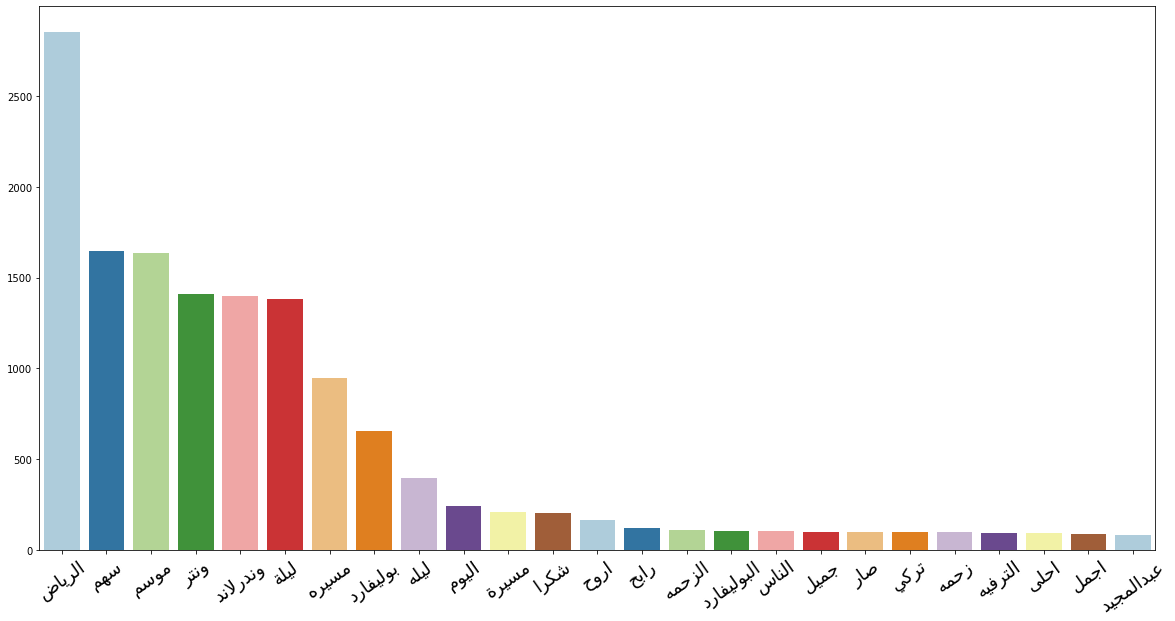

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data, frequent_words.values, palette="Paired")


for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
                tick.label.set_rotation(35)
plt.savefig('term_frequency_all_data.png')
plt.show()

In [0]:
pos_emojies = utils.view_emojie(merged[merged.label == 'Positive'].text)
neg_emojies = utils.view_emojie(merged[merged.label == 'Negative'].text)

In [0]:
print(pos_emojies)
print(neg_emojies)

0         
1         
2         
3       🌃😏
4         
        ..
3325      
3326      
3327     😍
3328     💔
3329     💙
Length: 3330, dtype: object
0        
1        
2        
3        
4        
       ..
941      
942      
943      
944    🎼🖤
945      
Length: 946, dtype: object


In [0]:
pos_emojies = pos_emojies.replace(r'^\s*$', np.nan, regex=True) # replace empty space with nan .. 
pos_emojies.dropna(inplace=True)

neg_emojies = neg_emojies.replace(r'^\s*$', np.nan, regex=True) 
neg_emojies.dropna(inplace=True)

In [0]:
display(pos_emojies.value_counts())

display(neg_emojies.value_counts())

❤                      117
😍                       93
💔                       76
💙                       66
♥                       47
                      ... 
😿💛💛                      1
💃🏽                       1
👍🔥👍                      1
😴🔥🔥🔥                     1
🎼♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥      1
Length: 963, dtype: int64

💔       17
😂       14
🙂       10
😷        6
😩        6
        ..
😒😒😒      1
🤮🤮🤮🤮     1
👀        1
🤣🤣       1
🤕        1
Length: 148, dtype: int64

In [0]:
pos_arr = []
neg_arr = []
for pos_row, neg_row in zip(pos_emojies, neg_emojies):
    for p_item, n_item  in zip(pos_row, neg_row):
        pos_arr.append(p_item)
        neg_arr.append(n_item)
     
pos_emojies = pd.Series(pos_arr)  
neg_emojies = pd.Series(neg_arr)      

In [0]:
display(pos_emojies.value_counts()[:10])
# display(pos_emojies.value_counts()[-7:])
pos_emojies.value_counts()[:10].to_csv('postive_emojies.csv', index=True)

😍    66
😭    43
❤    29
💔    24
😂    13
🥺    12
♥    10
💙     9
🔥     8
😔     6
dtype: int64

In [0]:
display(neg_emojies.value_counts()[:10])
# display(neg_emojies.value_counts()[-7:])
neg_emojies.value_counts()[:10].to_csv('negative_emojies.csv', index=True)

💔    50
😂    30
😭    23
🙂    20
🏻    12
😷    10
😡    10
🤢     9
😩     8
❤     8
dtype: int64

In [0]:
cleaned = utils.get_arabic_words(merged.text, handle_emojies='remove', remove_repeated_char=True)

In [0]:
flagged = utils.repeated_char(merged.text)
flagged = flagged.replace(r'^\s*$', np.nan, regex=True)
flagged[flagged.notna()]

30                تفوووتك
46              ابداااااع
52      ههههههههههههههههه
62              انجاززززز
91            وكوووووووبه
              ...        
4973             اوووووفر
4977               عيبببب
4978               جددددا
5003       خلاااااااااااص
5022          مستحييييييل
Length: 671, dtype: object

In [0]:
# combind = ' '.join(cleaned)

In [0]:
# data = arabic_reshaper.reshape(combind)
# data = get_display(data)

In [0]:
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [0]:
# wordcloud.to_file('word_cloud_black.png')

In [0]:
# plt.figure(figsize = (25, 25)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.tight_layout() 
# plt.show()

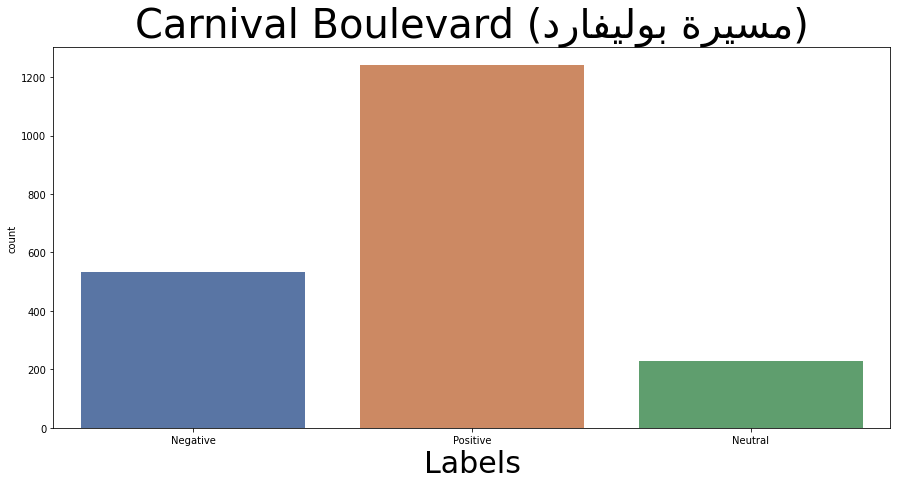

In [0]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(merged[merged.event=='carnival_bolivard'].label, palette='deep')
event = 'مسيرة بوليفارد'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'Carnival Boulevard ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('carnival_boulevard.png')

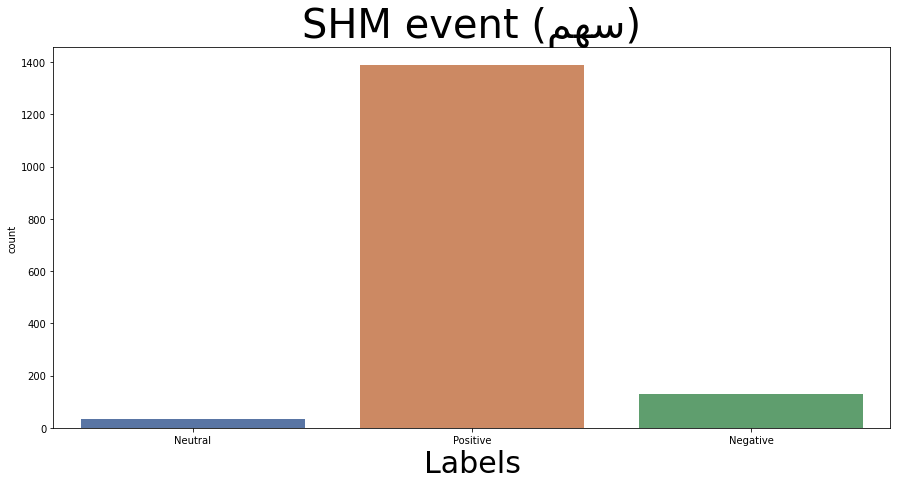

In [0]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged[merged.event=='shm'].label, palette='deep')
event = 'سهم'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'SHM event ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('shm.png')

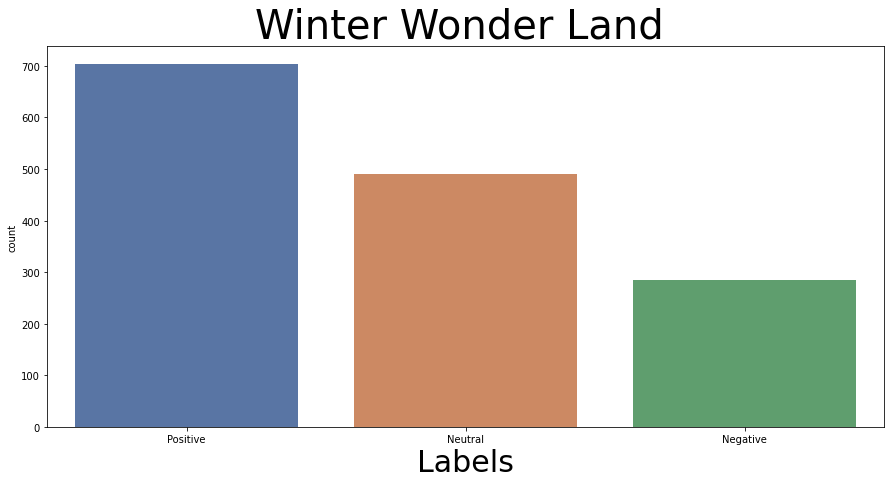

In [0]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged[merged.event=='winter_wonder_land'].label, palette="deep")

plt.title('Winter Wonder Land ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('winter_wonder_land.png')

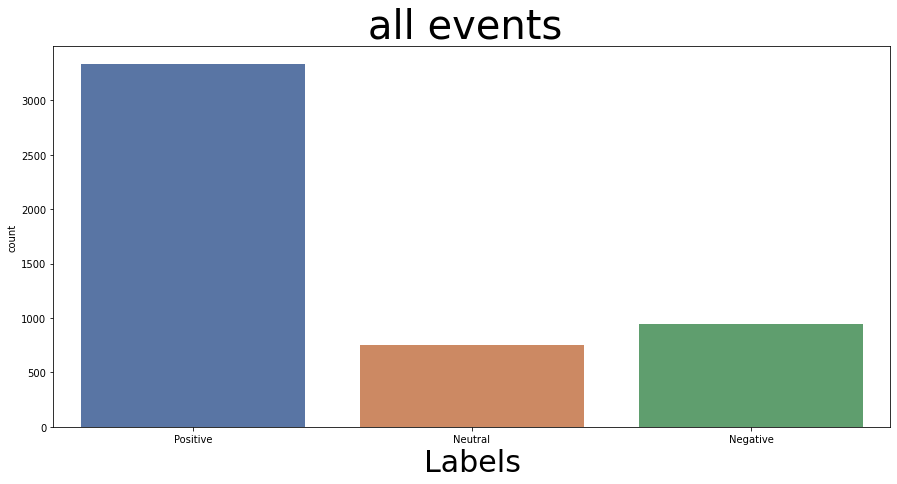

In [0]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged.label, palette='deep')
# event = 'سهم'
# event = arabic_reshaper.reshape(event)
# event = get_display(event)
plt.title('all events ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('events.png')

In [0]:
wonder_land = utils.get_arabic_words(winter.text, handle_emojies='remove', remove_repeated_char=False)
wonder_land = ' '.join(wonder_land)

In [0]:
# data = arabic_reshaper.reshape(wonder_land)
# data = get_display(data)
# wordcloud = WordCloud(background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [0]:
# plt.figure(figsize = (15, 15)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.title('Word Cloud Winter Wonder Land event', fontsize=40)
# plt.axis("off") 
# plt.savefig('Word_Cloud_Winter_Wonder_Land.png')
# plt.show()

In [0]:
shm_event = utils.get_arabic_words(shm.text, handle_emojies='remove', remove_repeated_char=False)
shm_event = ' '.join(shm_event)

In [0]:
# data = arabic_reshaper.reshape(shm_event)
# data = get_display(data)
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [0]:
# plt.figure(figsize = (15, 15)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.title('Word Cloud SHM event', fontsize=40)
# plt.tight_layout() 
# plt.savefig('Word_Cloud_SHM_Event.png')
# plt.show()

In [0]:
bolivard_event = utils.get_arabic_words(bolivard.text, handle_emojies='remove', remove_repeated_char=False)
bolivard_event = ' '.join(bolivard_event)

In [0]:
# data = arabic_reshaper.reshape(bolivard_event)
# data = get_display(data)
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [0]:
# plt.figure(figsize = (15, 15)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.title('Word Cloud Carnival Boulevard', fontsize=40)
# plt.tight_layout() 
# plt.savefig('Word_Cloud_Carnival_Boulevard.png')
# plt.show()

## Model Experiments 
* Use tfidf
* Use countVect
* Use lightLem..
* Experiemnt with different models.

 

In [0]:
from nltk.tokenize import word_tokenize
import nltk
# from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.pipeline import Pipeline
import gensim
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

### Pre-processing


In [59]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/grad_pr/labeled_tweets.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,date,tweet,user-name,loca,fv_count,rt-count,Event name,label
0,0,0.0,2019-11-06 16:06:06,ابي اروح❤️😞 #ليلة_سهم,vxzo19,Dammam,0.0,0.0,SHM,1
1,1,1.0,2019-11-06 0:37:37,أصاااله😩💜 #ليلة_سهم,Nourasulaiman89,Riyadh,0.0,0.0,SHM,1
2,2,2.0,2019-11-06 0:37:33,يا احلا مفاجأه صوتي راح 😍\nوصلنا احساسه كيف لو...,Fayalessa_,"Riyadh,Kingdom of Saudi Arabia",0.0,0.0,SHM,1
3,3,3.0,2019-11-06 0:37:21,#ليلة_سهم وش هالليله الطربيه وش هالمتعه وش هال...,aallii050505,"الرياض, المملكة العربية السعود",1.0,0.0,SHM,1
4,4,4.0,2019-11-06 0:37:21,شابة اشتغل ( مونتاج مقاطع وتصاميم وانفوجرافيك ...,fidyu2020,NaN,0.0,0.0,SHM,2


In [60]:
df.shape, df.label.notna().sum()

((25000, 10), 24557)

In [61]:
df.label.unique()

array(['1', '2', '0', '1.0', '0.0', '2.0', nan, '11.0', '1,0', '21.0',
       '11', '22', '12.0'], dtype=object)

In [0]:
df.dropna(subset = ['label',], inplace=True)

In [63]:
df.label.value_counts()

1       8013
1.0     7550
2       4507
2.0     2278
0       1473
0.0      729
11.0       2
22         1
1,0        1
21.0       1
12.0       1
11         1
Name: label, dtype: int64

In [0]:
df = df[df.label != '1,0']
df = df[df.label != '21.0']
df = df[df.label != '12.0']

In [0]:
df.label.replace('11.0', '1', inplace=True)
df.label.replace('22', '2', inplace=True)
df.label.replace('11', '1', inplace=True)

In [0]:
df.label = df.label.astype(np.float)
df.label = df.label.astype(np.int)

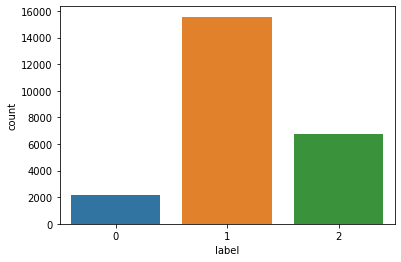

In [67]:
sns.countplot(df.label);

In [0]:
# display(merged.head(2))

In [0]:
# store data as texts to

In [0]:
# X_merged = merged.text
# y_merged = np.array(merged['label']).reshape(-1, 1)
# encoder = LabelEncoder().fit(y)

In [0]:
# X_merged.shape, y_merged.shape

In [0]:
# la_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
# la_mapping

In [0]:
# y = encoder.transform(y)

In [0]:
# y = y.reshape(-1, 1)

In [0]:
# clean text
# X = utils.get_arabic_words(X.text, handle_emojies='remove', remove_repeated_char=True)

In [0]:
merged.label = merged.label.map({'Positive':1, 'Negative':0, 'Neutral':2})

In [0]:
df.tweet = df.tweet.astype(str)

In [0]:
# df_subset = df.copy()

In [0]:
# df_subset = df.append(merged)

In [0]:
# df_subset = df_subset[df_subset.label!=1]
# df_subset = df_subset[df_subset.label!=2]

In [0]:
# df_subset.shape

In [0]:
# df_subset = df_subset.append(df[df.label==1].sample(2500))
# df_subset = df_subset.append(df[df.label==2].sample(2500))

In [0]:
# df_subset.shape

In [0]:
# helper func
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
def stem(text):
    stemer = ArabicLightStemmer()
    tokens = word_tokenize(text)
    tokens_ = [stemer.light_stem(word) for word in tokens]
    text_ = ' '.join(word for word in tokens_)
    return text_
def plot_pca(pca):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 4))
    size = len(pca.explained_variance_ratio_)
    ax1.bar(range(size), pca.explained_variance_ratio_)
    ax2.plot(range(size), np.cumsum(pca.explained_variance_ratio_), '--')
    plt.show()
def display_results(classiffier, y_test, y_pred, X, y, text):
    # labels = np.unique(y_pred)
    # labels = encoder.classes_
    labels = ['Negative', 'Postive', 'Neutral']
    # confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(text)
    print("Labels:", labels)
    # print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print(report)
    plot_confusion_matrix(classiffier, X, y,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    plt.show()

In [0]:
df = df.rename(columns={'tweet':'text'})

In [0]:
merged.label.value_counts(), df.label.value_counts()

(1    3330
 0     946
 2     751
 Name: label, dtype: int64, 1    15566
 2     6786
 0     2202
 Name: label, dtype: int64)

In [0]:
# merged = merged.append(df[df.label==0])

In [0]:
# merged = merged.append(df[df.label==2].sample(2000))

In [0]:
X_stem = merged.text.apply(stem)
X_norm = merged.text

In [0]:
y = np.array(merged.label).reshape(-1, 1)
X_stem.shape, y.shape

((5027,), (5027, 1))

In [0]:
pd.Series(y.flatten()).value_counts()

1    3330
0     946
2     751
dtype: int64

In [0]:
X_norm = utils.get_arabic_words(X_norm, handle_emojies='emoticon', remove_repeated_char=True)
X_stem = utils.get_arabic_words(X_stem, handle_emojies='emoticon', remove_repeated_char=True)

In [0]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y,random_state=42, stratify=y, test_size=0.2)
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(X_stem, y,random_state=42, stratify=y, test_size=0.2)

In [0]:
X_train_norm.shape, X_test_norm.shape

((4021,), (1006,))

In [0]:
# v=CountVectorizer(ngram_range=(3, 3)).fit(["an apple a day keeps the doctor away"]) 
# print(v.vocabulary_)

In [0]:
tf_steps = [
          ('tfidf', TfidfVectorizer(ngram_range=(2, 2))),
          ('spare_to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True))
        ]    
tfidf_transformer = Pipeline(tf_steps)

cvec_steps = [
          ('countvec', CountVectorizer(ngram_range=(2, 2))),
          ('spare_to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True))
        ]    
cvec_transformer = Pipeline(cvec_steps)

### Modeling without Stemming.

In [0]:
tfidf = tfidf_transformer.fit(X_train_norm)
X_train_tfidf = tfidf.transform(X_train_norm)
X_test_tfidf = tfidf.transform(X_test_norm)

cvec = cvec_transformer.fit(X_train_norm)
X_train_vec = cvec.transform(X_train_norm)
X_test_vec = cvec.transform(X_test_norm)

In [0]:
X_train_tfidf.shape

(4021, 22886)

In [0]:
pca = PCA(4000).fit(X_train_tfidf)

In [0]:
pca.explained_variance_ratio_.sum() 

1.0

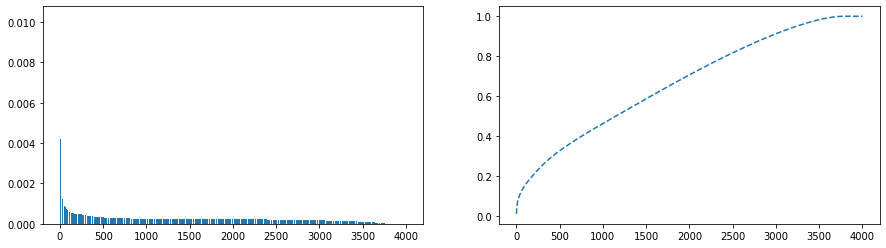

In [0]:
plot_pca(pca)

In [0]:
# X_test.shape

In [0]:
X_train_tfidf = pca.transform(X_train_tfidf)
X_test_tfidf = pca.transform(X_test_tfidf)

X_train_vec = pca.transform(X_train_vec)
X_test_vec = pca.transform(X_test_vec)

In [0]:
# X_train_pca.shape,  X_test_pca.shape

((15960, 5100), (8594, 5100))

In [0]:
# pd.Series(y_train.flatten()).value_counts()

1    12282
2     4899
0     2046
dtype: int64

In [0]:
# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_sample(X_train_pca, y_train.ravel())

# rus = RandomUnderSampler()
# X_rus, y_rus = rus.fit_sample(X_train_pca, y_train)


# smote = SMOTE(ratio='minority')
# X_sm, y_sm = smote.fit_sample(X_train_pca, y_train)

# from imblearn.combine import SMOTETomek
# smt = SMOTE()
# X_smt, y_smt = smt.fit_sample(X_train_pca, y_train)


# smote = SMOTE(ratio='minority')
# X_sm, y_sm = smote.fit_sample(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# X_ros.shape, y_ros.shape, pd.Series(y_ros.flatten()).value_counts()
# X_smt.shape, y_smt.shape

((36846, 5100), (36846,))

In [0]:
# scaling
# X_ros_scaled = MinMaxScaler().fit_transform(X_ros)
# X_test_pca_scaled = MinMaxScaler().fit_transform(X_test_pca)

In [0]:
X_train_tfidf.shape

(4021, 4000)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9492663516538175
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       757
           1       0.95      0.99      0.97      2663
           2       0.91      0.81      0.86       601

    accuracy                           0.95      4021
   macro avg       0.94      0.91      0.92      4021
weighted avg       0.95      0.95      0.95      4021



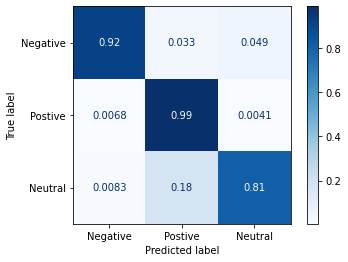

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7047713717693836
              precision    recall  f1-score   support

           0       0.45      0.62      0.52       189
           1       0.90      0.76      0.82       667
           2       0.47      0.57      0.52       150

    accuracy                           0.70      1006
   macro avg       0.61      0.65      0.62      1006
weighted avg       0.75      0.70      0.72      1006



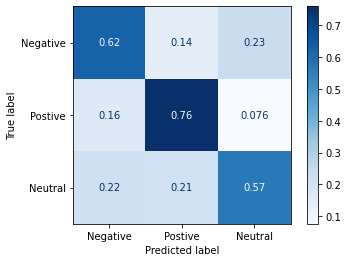

In [0]:
ada_tf = AdaBoostClassifier(base_estimator= RidgeClassifier(), n_estimators=150, algorithm='SAMME').fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(ada_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(ada_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(ada_tf, open('adaBoost_tf_no_stem.sav', 'wb'))

display_results(ada_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(ada_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9460333250435216
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       757
           1       0.94      0.99      0.96      2663
           2       0.95      0.79      0.86       601

    accuracy                           0.95      4021
   macro avg       0.95      0.90      0.92      4021
weighted avg       0.95      0.95      0.94      4021



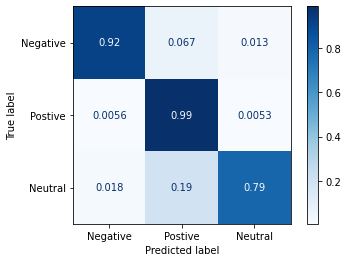

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7127236580516899
              precision    recall  f1-score   support

           0       0.60      0.35      0.45       189
           1       0.76      0.91      0.83       667
           2       0.44      0.29      0.35       150

    accuracy                           0.71      1006
   macro avg       0.60      0.52      0.54      1006
weighted avg       0.68      0.71      0.69      1006



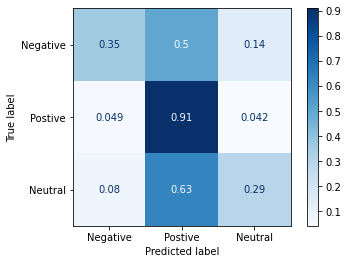

In [0]:
ada_vec = AdaBoostClassifier(base_estimator= RidgeClassifier(), n_estimators=150, algorithm='SAMME').fit(X_train_vec, y_train_norm)
y_pred_test = np.array(ada_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(ada_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(ada_vec, open('adaBoost_vec_no_stem.sav', 'wb'))

display_results(ada_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(ada_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9845809500124347
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       757
           1       1.00      0.98      0.99      2663
           2       0.92      1.00      0.96       601

    accuracy                           0.98      4021
   macro avg       0.97      0.99      0.98      4021
weighted avg       0.99      0.98      0.98      4021



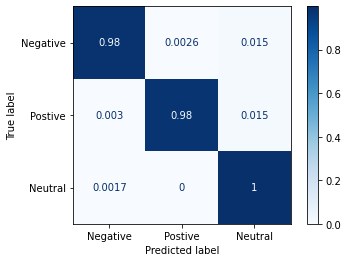

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.73558648111332
              precision    recall  f1-score   support

           0       0.57      0.54      0.55       189
           1       0.87      0.83      0.85       667
           2       0.44      0.55      0.49       150

    accuracy                           0.74      1006
   macro avg       0.63      0.64      0.63      1006
weighted avg       0.75      0.74      0.74      1006



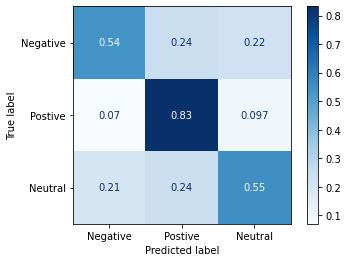

In [0]:
ridge_tf = RidgeClassifier(normalize=False, class_weight='balanced', fit_intercept=True).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(ridge_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(ridge_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(ridge_tf, open('ridge_tf_no_stem.sav', 'wb'))

display_results(ridge_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(ridge_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.983337478239244
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       1.00      0.98      0.99      2663
           2       0.93      0.99      0.96       601

    accuracy                           0.98      4021
   macro avg       0.97      0.98      0.98      4021
weighted avg       0.98      0.98      0.98      4021



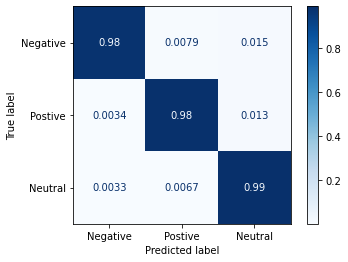

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7395626242544732
              precision    recall  f1-score   support

           0       0.63      0.39      0.48       189
           1       0.81      0.89      0.85       667
           2       0.48      0.51      0.49       150

    accuracy                           0.74      1006
   macro avg       0.64      0.60      0.61      1006
weighted avg       0.73      0.74      0.73      1006



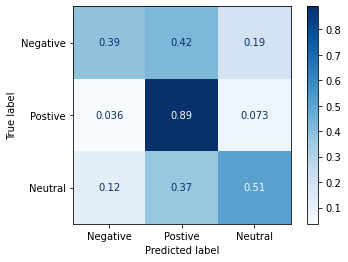

In [0]:
ridge_vec = RidgeClassifier(normalize=False, class_weight='balanced', fit_intercept=True).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(ridge_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(ridge_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(ridge_vec, open('ridge_vec_no_stem.sav', 'wb'))

display_results(ridge_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(ridge_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9363342452126336
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       757
           1       1.00      0.91      0.95      2663
           2       0.75      0.99      0.85       601

    accuracy                           0.94      4021
   macro avg       0.90      0.96      0.92      4021
weighted avg       0.95      0.94      0.94      4021



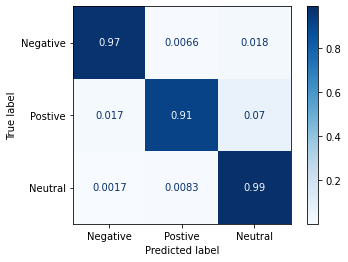

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7186878727634195
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       189
           1       0.90      0.78      0.84       667
           2       0.39      0.65      0.49       150

    accuracy                           0.72      1006
   macro avg       0.63      0.66      0.63      1006
weighted avg       0.77      0.72      0.73      1006



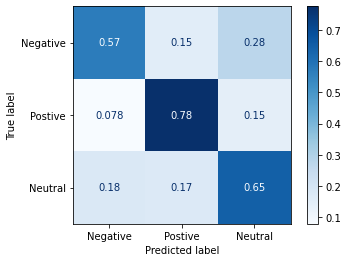

In [0]:
lg_tf = LogisticRegression(class_weight='balanced', solver='saga', multi_class='multinomial', max_iter=200).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(lg_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(lg_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(lg_tf, open('lg_tf_no_stem.sav', 'wb'))

display_results(lg_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(lg_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9094752549117135
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       757
           1       0.99      0.88      0.93      2663
           2       0.70      0.97      0.81       601

    accuracy                           0.91      4021
   macro avg       0.86      0.94      0.89      4021
weighted avg       0.93      0.91      0.91      4021



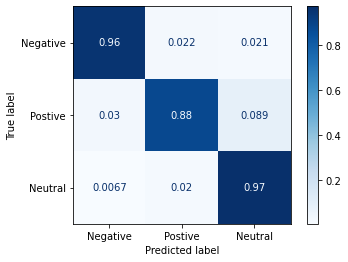

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.705765407554672
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       189
           1       0.91      0.75      0.82       667
           2       0.40      0.61      0.48       150

    accuracy                           0.71      1006
   macro avg       0.61      0.66      0.62      1006
weighted avg       0.76      0.71      0.72      1006



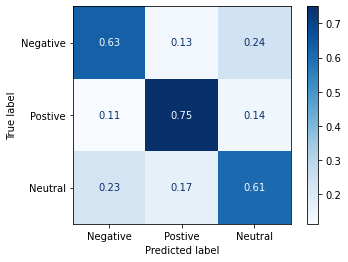

In [0]:
lg_vec = LogisticRegression(class_weight='balanced', solver='saga', multi_class='multinomial').fit(X_train_vec, y_train_norm)
y_pred_test = np.array(lg_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(lg_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(lg_vec, open('lg_vec_no_stem.sav', 'wb'))

display_results(lg_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(lg_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9860731161402636
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       757
           1       0.99      1.00      0.99      2663
           2       0.98      0.95      0.96       601

    accuracy                           0.99      4021
   macro avg       0.99      0.97      0.98      4021
weighted avg       0.99      0.99      0.99      4021



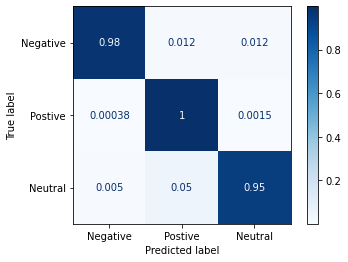

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.742544731610338
              precision    recall  f1-score   support

           0       0.60      0.46      0.52       189
           1       0.84      0.88      0.86       667
           2       0.46      0.49      0.47       150

    accuracy                           0.74      1006
   macro avg       0.63      0.61      0.62      1006
weighted avg       0.74      0.74      0.74      1006



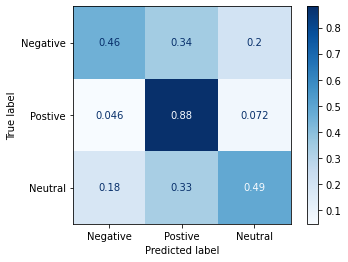

In [0]:
svc_tf = LinearSVC(verbose=1).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(svc_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(svc_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(svc_tf, open('svc_tf_no_stem.sav', 'wb'))

display_results(svc_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(svc_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9858244217856255
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       757
           1       0.99      0.99      0.99      2663
           2       0.96      0.96      0.96       601

    accuracy                           0.99      4021
   macro avg       0.98      0.98      0.98      4021
weighted avg       0.99      0.99      0.99      4021



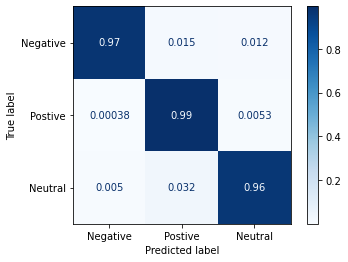

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7326043737574552
              precision    recall  f1-score   support

           0       0.68      0.29      0.40       189
           1       0.80      0.91      0.85       667
           2       0.46      0.49      0.47       150

    accuracy                           0.73      1006
   macro avg       0.65      0.56      0.57      1006
weighted avg       0.72      0.73      0.71      1006



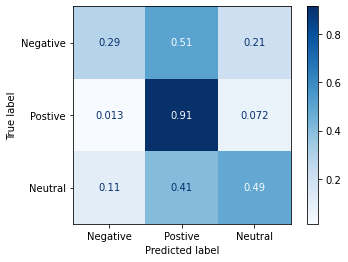

In [0]:
svc_vec = LinearSVC(verbose=1).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(svc_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(svc_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(svc_vec, open('svc_vec_no_stem.sav', 'wb'))

display_results(svc_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(svc_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9736383984083561
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       757
           1       0.98      0.99      0.98      2663
           2       0.96      0.91      0.93       601

    accuracy                           0.97      4021
   macro avg       0.97      0.96      0.96      4021
weighted avg       0.97      0.97      0.97      4021



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


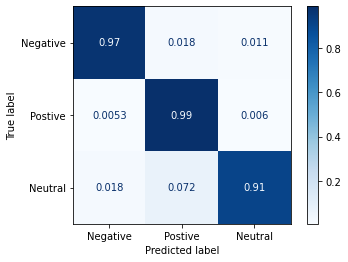

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7017892644135189
              precision    recall  f1-score   support

           0       0.51      0.21      0.29       189
           1       0.74      0.94      0.83       667
           2       0.49      0.29      0.36       150

    accuracy                           0.70      1006
   macro avg       0.58      0.48      0.49      1006
weighted avg       0.66      0.70      0.66      1006



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


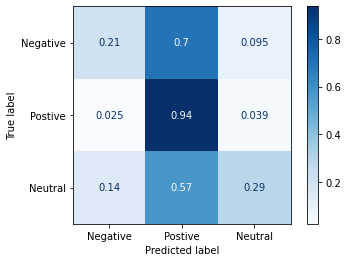

In [0]:
bag_tf = BaggingClassifier(verbose=1).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(bag_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(bag_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(bag_tf, open('bag_tf_no_stem.sav', 'wb'))

display_results(bag_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(bag_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9731410096990798
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       757
           1       0.98      0.99      0.98      2663
           2       0.97      0.90      0.93       601

    accuracy                           0.97      4021
   macro avg       0.97      0.95      0.96      4021
weighted avg       0.97      0.97      0.97      4021



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


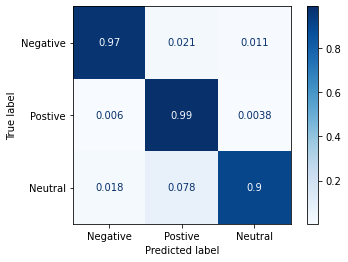

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7037773359840954
              precision    recall  f1-score   support

           0       0.49      0.37      0.42       189
           1       0.78      0.88      0.83       667
           2       0.46      0.35      0.40       150

    accuracy                           0.70      1006
   macro avg       0.58      0.53      0.55      1006
weighted avg       0.68      0.70      0.69      1006



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


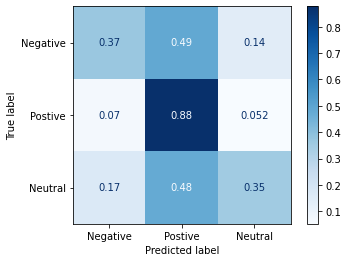

In [0]:
bag_vec = BaggingClassifier(verbose=1).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(bag_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(bag_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(bag_vec, open('bag_vec_no_stem.sav', 'wb'))

display_results(bag_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(bag_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.983337478239244
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       0.98      1.00      0.99      2663
           2       0.97      0.94      0.96       601

    accuracy                           0.98      4021
   macro avg       0.98      0.97      0.98      4021
weighted avg       0.98      0.98      0.98      4021



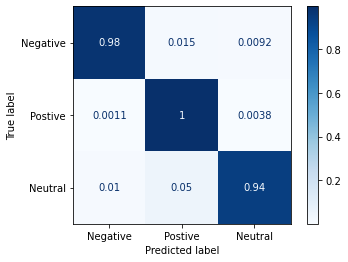

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7534791252485089
              precision    recall  f1-score   support

           0       0.61      0.51      0.56       189
           1       0.84      0.89      0.86       667
           2       0.49      0.47      0.48       150

    accuracy                           0.75      1006
   macro avg       0.65      0.62      0.63      1006
weighted avg       0.74      0.75      0.75      1006



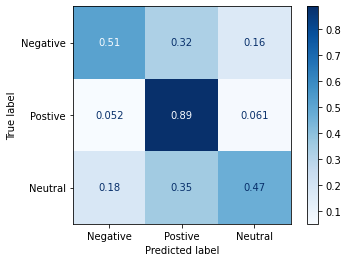

In [0]:
sgd_tf = SGDClassifier().fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(sgd_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(sgd_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(sgd_tf, open('sgd_tf_no_stem.sav', 'wb'))

display_results(sgd_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(sgd_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9838348669485203
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       757
           1       0.99      0.99      0.99      2663
           2       0.96      0.95      0.96       601

    accuracy                           0.98      4021
   macro avg       0.98      0.97      0.98      4021
weighted avg       0.98      0.98      0.98      4021



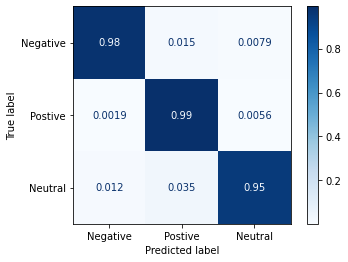

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7365805168986084
              precision    recall  f1-score   support

           0       0.67      0.30      0.41       189
           1       0.78      0.93      0.85       667
           2       0.50      0.43      0.46       150

    accuracy                           0.74      1006
   macro avg       0.65      0.55      0.57      1006
weighted avg       0.72      0.74      0.71      1006



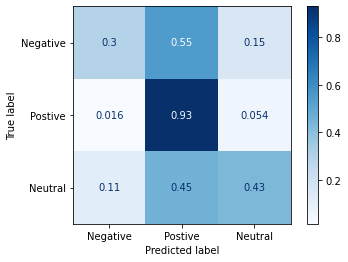

In [0]:
sgd_vec = SGDClassifier().fit(X_train_vec, y_train_norm)
y_pred_test = np.array(sgd_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(sgd_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(sgd_tf, open('sgd_vec_no_stem.sav', 'wb'))

display_results(sgd_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(sgd_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   27.4s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 150 out of 150 | elapsed:    0.1s finished


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9860731161402636
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       0.99      0.99      0.99      2663
           2       0.97      0.95      0.96       601

    accuracy                           0.99      4021
   macro avg       0.98      0.98      0.98      4021
weighted avg       0.99      0.99      0.99      4021



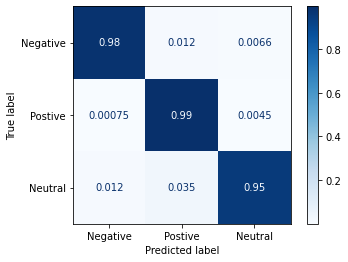

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.6878727634194831
              precision    recall  f1-score   support

           0       0.50      0.14      0.22       189
           1       0.72      0.94      0.81       667
           2       0.49      0.26      0.34       150

    accuracy                           0.69      1006
   macro avg       0.57      0.45      0.46      1006
weighted avg       0.64      0.69      0.63      1006



[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 150 out of 150 | elapsed:    0.1s finished


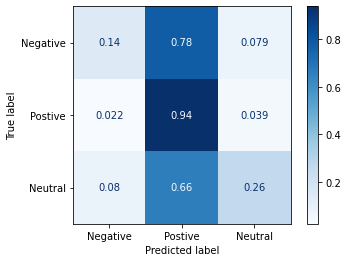

In [0]:
rf_tf = RandomForestClassifier(n_estimators=150, verbose=-1, min_samples_split=3, max_features=1000, n_jobs=-1).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(rf_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(rf_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(rf_tf, open('rf_tf_no_stem.sav', 'wb'))

display_results(rf_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(rf_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   35.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9786122855011191
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       757
           1       0.98      0.99      0.99      2663
           2       0.96      0.94      0.95       601

    accuracy                           0.98      4021
   macro avg       0.97      0.97      0.97      4021
weighted avg       0.98      0.98      0.98      4021



[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


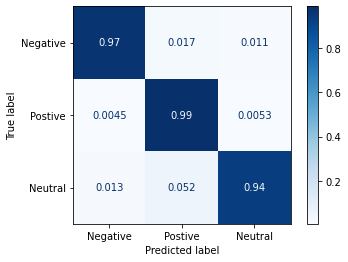

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7027833001988072
              precision    recall  f1-score   support

           0       0.51      0.31      0.39       189
           1       0.76      0.90      0.82       667
           2       0.48      0.31      0.38       150

    accuracy                           0.70      1006
   macro avg       0.58      0.51      0.53      1006
weighted avg       0.67      0.70      0.68      1006



[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


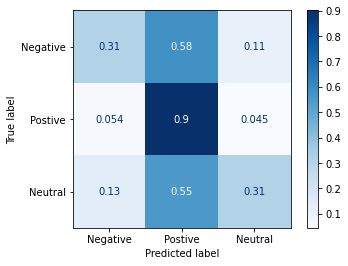

In [0]:
rf_vec = RandomForestClassifier(n_estimators=150, verbose=1, min_samples_split=3,).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(rf_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(rf_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(rf_vec, open('rf_vec_no_stem.sav', 'wb'))

display_results(rf_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(rf_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.8065157920915195
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       757
           1       0.88      0.91      0.89      2663
           2       0.62      0.59      0.60       601

    accuracy                           0.81      4021
   macro avg       0.72      0.70      0.71      4021
weighted avg       0.80      0.81      0.80      4021



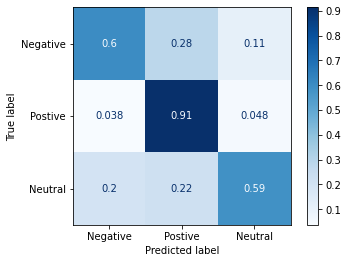

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7157057654075547
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       189
           1       0.84      0.85      0.85       667
           2       0.44      0.45      0.45       150

    accuracy                           0.72      1006
   macro avg       0.59      0.58      0.59      1006
weighted avg       0.71      0.72      0.71      1006



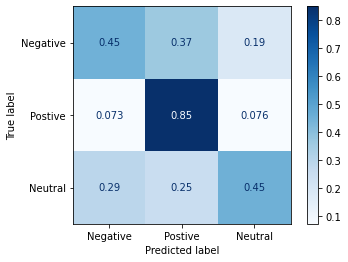

In [0]:
knn_tf = KNeighborsClassifier(n_neighbors=3).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(knn_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(knn_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(knn_tf, open('knn_tf_no_stem.sav', 'wb'))

display_results(knn_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(knn_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7731907485700075
              precision    recall  f1-score   support

           0       0.55      0.73      0.63       757
           1       0.93      0.82      0.87      2663
           2       0.55      0.61      0.58       601

    accuracy                           0.77      4021
   macro avg       0.68      0.72      0.69      4021
weighted avg       0.80      0.77      0.78      4021



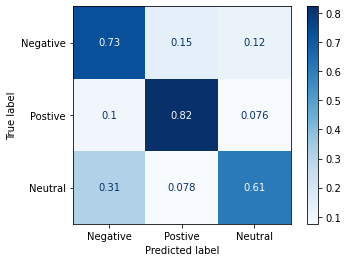

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.5924453280318092
              precision    recall  f1-score   support

           0       0.31      0.43      0.36       189
           1       0.83      0.66      0.74       667
           2       0.35      0.49      0.41       150

    accuracy                           0.59      1006
   macro avg       0.50      0.53      0.50      1006
weighted avg       0.66      0.59      0.62      1006



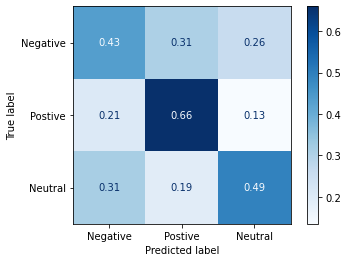

In [0]:
knn_vec = KNeighborsClassifier(n_neighbors=3).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(knn_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(knn_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(knn_vec, open('knn_vec_no_stem.sav', 'wb'))

display_results(knn_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(knn_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

### Modeling with Stem

In [0]:
# for stem ver.
tfidf = tfidf_transformer.fit(X_train_stem)
X_train_tfidf = tfidf.transform(X_train_stem)
X_test_tfidf = tfidf.transform(X_test_stem)

cvec = cvec_transformer.fit(X_train_stem)
X_train_vec = cvec.transform(X_train_stem)
X_test_vec = cvec.transform(X_test_stem)

In [0]:
X_train_tfidf.shape, X_test_tfidf.shape

((4021, 18125), (1006, 18125))

In [0]:
pca = PCA(n_components=4021).fit(X_train_tfidf)

In [0]:
pca.explained_variance_ratio_.sum()

1.0

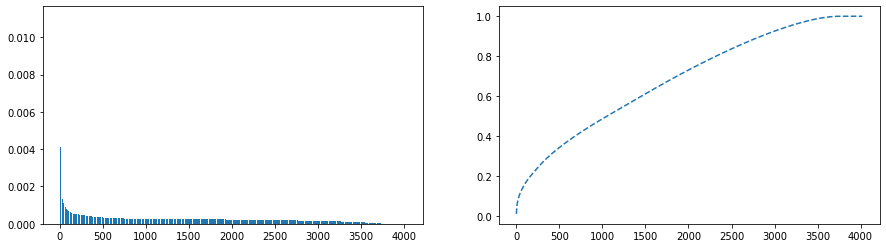

In [0]:
plot_pca(pca)

In [0]:
X_train_tfidf = pca.transform(X_train_tfidf)
X_test_tfidf = pca.transform(X_test_tfidf)

X_train_vec = pca.transform(X_train_vec)
X_test_vec = pca.transform(X_test_vec)

In [0]:
X_train_vec.shape

(4021, 4021)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7699577219597115
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       757
           1       0.81      0.90      0.85      2663
           2       0.65      0.57      0.60       601

    accuracy                           0.77      4021
   macro avg       0.70      0.65      0.67      4021
weighted avg       0.76      0.77      0.76      4021



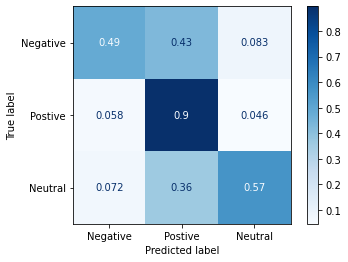

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.6699801192842942
              precision    recall  f1-score   support

           0       0.42      0.08      0.14       189
           1       0.71      0.94      0.81       667
           2       0.38      0.20      0.26       150

    accuracy                           0.67      1006
   macro avg       0.50      0.41      0.40      1006
weighted avg       0.60      0.67      0.60      1006



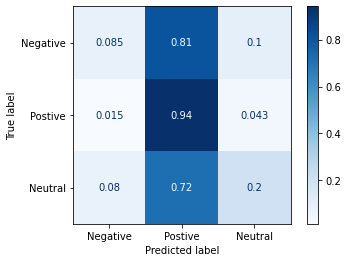

In [0]:
ada_tf = AdaBoostClassifier(n_estimators=100).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(ada_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(ada_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(ada_tf, open('adaBoost_tf_stem.sav', 'wb'))

display_results(ada_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_stem, 'Training Set')
display_results(ada_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7739368316339219
              precision    recall  f1-score   support

           0       0.69      0.57      0.62       757
           1       0.84      0.88      0.86      2663
           2       0.57      0.55      0.56       601

    accuracy                           0.77      4021
   macro avg       0.70      0.67      0.68      4021
weighted avg       0.77      0.77      0.77      4021



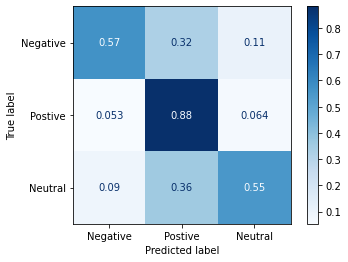

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7047713717693836
              precision    recall  f1-score   support

           0       0.60      0.25      0.35       189
           1       0.81      0.86      0.84       667
           2       0.39      0.59      0.47       150

    accuracy                           0.70      1006
   macro avg       0.60      0.57      0.55      1006
weighted avg       0.71      0.70      0.69      1006



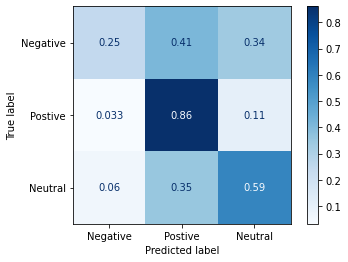

In [0]:
ada_vec = AdaBoostClassifier(n_estimators=100).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(ada_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(ada_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(ada_vec, open('adaBoost_vec_stem.sav', 'wb'))

display_results(ada_vec, y_train_norm, y_pred_train, X_train_vec, y_train_stem, 'Training Set')
display_results(ada_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9815966177567769
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       757
           1       1.00      0.98      0.99      2663
           2       0.92      0.99      0.95       601

    accuracy                           0.98      4021
   macro avg       0.97      0.98      0.97      4021
weighted avg       0.98      0.98      0.98      4021



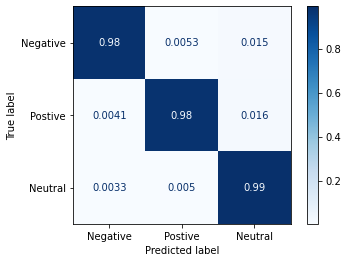

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7405566600397614
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       189
           1       0.87      0.84      0.85       667
           2       0.45      0.56      0.50       150

    accuracy                           0.74      1006
   macro avg       0.63      0.64      0.63      1006
weighted avg       0.75      0.74      0.74      1006



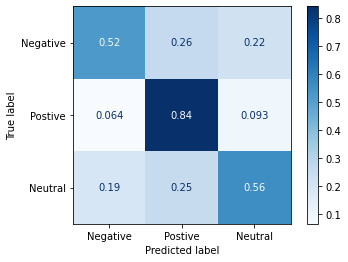

In [0]:
ridge_tf = RidgeClassifier(normalize=False, class_weight='balanced', fit_intercept=True).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(ridge_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(ridge_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(ridge_tf, open('ridge_tf_stem.sav', 'wb'))

display_results(ridge_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(ridge_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.983337478239244
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       1.00      0.98      0.99      2663
           2       0.93      0.99      0.96       601

    accuracy                           0.98      4021
   macro avg       0.97      0.98      0.98      4021
weighted avg       0.98      0.98      0.98      4021



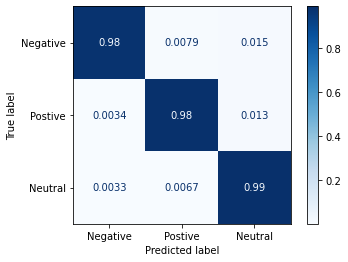

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7395626242544732
              precision    recall  f1-score   support

           0       0.63      0.39      0.48       189
           1       0.81      0.89      0.85       667
           2       0.48      0.51      0.49       150

    accuracy                           0.74      1006
   macro avg       0.64      0.60      0.61      1006
weighted avg       0.73      0.74      0.73      1006



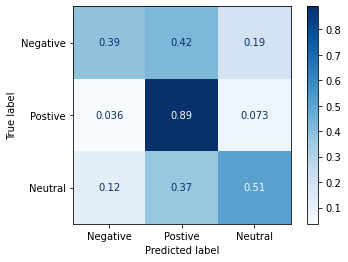

In [0]:
ridge_vec = RidgeClassifier(normalize=False, class_weight='balanced', fit_intercept=True).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(ridge_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(ridge_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(ridge_vec, open('ridge_vec_stem.sav', 'wb'))

display_results(ridge_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(ridge_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9437950758517781
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       757
           1       0.99      0.93      0.96      2663
           2       0.78      0.98      0.86       601

    accuracy                           0.94      4021
   macro avg       0.91      0.96      0.93      4021
weighted avg       0.95      0.94      0.95      4021



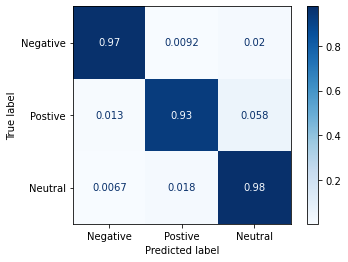

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7166998011928429
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       189
           1       0.88      0.79      0.83       667
           2       0.41      0.63      0.49       150

    accuracy                           0.72      1006
   macro avg       0.62      0.65      0.63      1006
weighted avg       0.75      0.72      0.73      1006



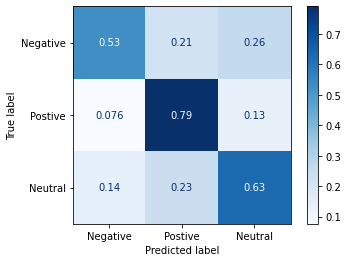

In [0]:
lg_tf = LogisticRegression(class_weight='balanced', solver='saga', multi_class='multinomial', max_iter=1000).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(lg_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(lg_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(lg_tf, open('lg_tf_stem.sav', 'wb'))

display_results(lg_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(lg_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9465307137527978
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       757
           1       0.99      0.94      0.96      2663
           2       0.80      0.97      0.88       601

    accuracy                           0.95      4021
   macro avg       0.91      0.96      0.93      4021
weighted avg       0.95      0.95      0.95      4021



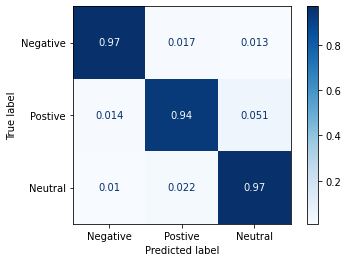

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7206759443339961
              precision    recall  f1-score   support

           0       0.53      0.45      0.49       189
           1       0.84      0.83      0.83       667
           2       0.46      0.57      0.51       150

    accuracy                           0.72      1006
   macro avg       0.61      0.62      0.61      1006
weighted avg       0.73      0.72      0.72      1006



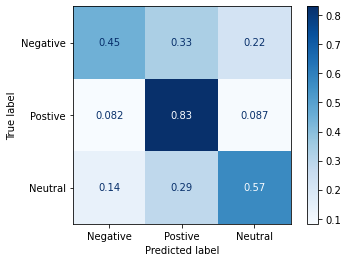

In [0]:
lg_vec = LogisticRegression(class_weight='balanced', solver='saga', multi_class='multinomial', max_iter=200).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(lg_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(lg_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(lg_vec, open('lg_vec_stem.sav', 'wb'))

display_results(lg_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(lg_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9840835613031584
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       0.98      1.00      0.99      2663
           2       0.98      0.94      0.96       601

    accuracy                           0.98      4021
   macro avg       0.98      0.97      0.98      4021
weighted avg       0.98      0.98      0.98      4021



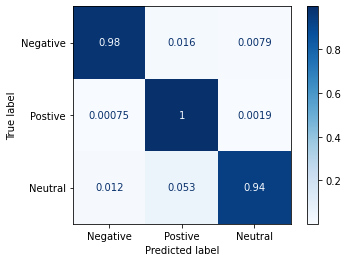

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7544731610337972
              precision    recall  f1-score   support

           0       0.63      0.48      0.54       189
           1       0.83      0.90      0.86       667
           2       0.50      0.47      0.48       150

    accuracy                           0.75      1006
   macro avg       0.65      0.62      0.63      1006
weighted avg       0.74      0.75      0.75      1006



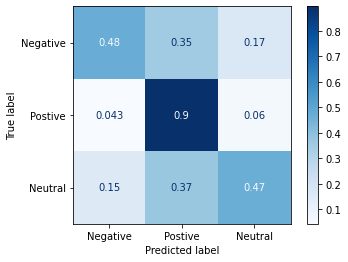

In [0]:
svc_tf = LinearSVC(verbose=1).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(svc_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(svc_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(svc_tf, open('svc_tf_stem.sav', 'wb'))

display_results(svc_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(svc_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9840835613031584
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       757
           1       0.99      0.99      0.99      2663
           2       0.96      0.96      0.96       601

    accuracy                           0.98      4021
   macro avg       0.98      0.97      0.98      4021
weighted avg       0.98      0.98      0.98      4021



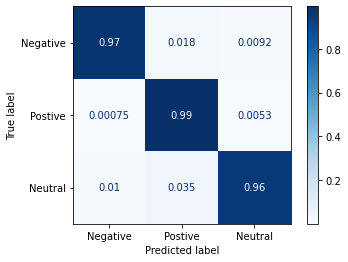

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7335984095427436
              precision    recall  f1-score   support

           0       0.66      0.27      0.38       189
           1       0.78      0.93      0.85       667
           2       0.50      0.44      0.47       150

    accuracy                           0.73      1006
   macro avg       0.65      0.55      0.57      1006
weighted avg       0.72      0.73      0.70      1006



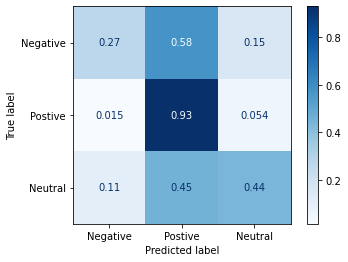

In [0]:
svc_vec = LinearSVC(verbose=1).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(svc_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(svc_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(svc_vec, open('svc_vec_stem.sav', 'wb'))

display_results(svc_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(svc_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9728923153444416
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       757
           1       0.98      0.99      0.98      2663
           2       0.95      0.92      0.94       601

    accuracy                           0.97      4021
   macro avg       0.97      0.96      0.96      4021
weighted avg       0.97      0.97      0.97      4021



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


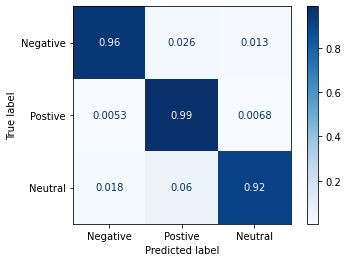

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.6958250497017893
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       189
           1       0.77      0.86      0.82       667
           2       0.52      0.33      0.40       150

    accuracy                           0.70      1006
   macro avg       0.58      0.53      0.55      1006
weighted avg       0.68      0.70      0.68      1006



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


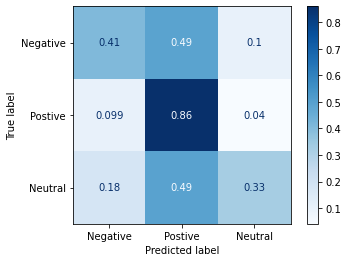

In [0]:
bag_tf = BaggingClassifier(verbose=1).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(bag_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(bag_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(bag_tf, open('bag_tf_stem.sav', 'wb'))

display_results(bag_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(bag_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9748818701815469
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       757
           1       0.98      0.99      0.98      2663
           2       0.97      0.91      0.94       601

    accuracy                           0.97      4021
   macro avg       0.97      0.96      0.96      4021
weighted avg       0.97      0.97      0.97      4021



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


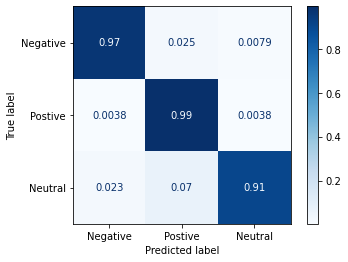

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7017892644135189
              precision    recall  f1-score   support

           0       0.54      0.28      0.37       189
           1       0.74      0.92      0.82       667
           2       0.54      0.28      0.37       150

    accuracy                           0.70      1006
   macro avg       0.61      0.49      0.52      1006
weighted avg       0.67      0.70      0.67      1006



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


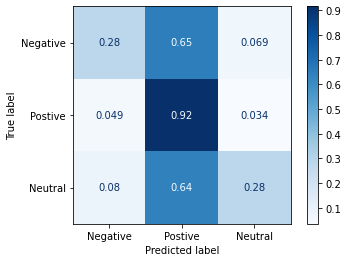

In [0]:
bag_vec = BaggingClassifier(verbose=1).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(bag_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(bag_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(bag_vec, open('bag_vec_stem.sav', 'wb'))

display_results(bag_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(bag_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9830887838846059
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       0.98      1.00      0.99      2663
           2       0.98      0.94      0.95       601

    accuracy                           0.98      4021
   macro avg       0.98      0.97      0.98      4021
weighted avg       0.98      0.98      0.98      4021



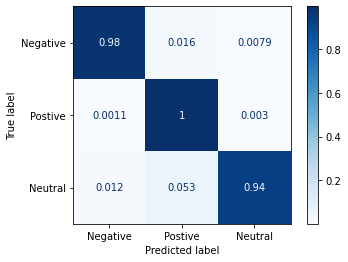

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7504970178926441
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       189
           1       0.83      0.89      0.86       667
           2       0.49      0.47      0.48       150

    accuracy                           0.75      1006
   macro avg       0.64      0.62      0.63      1006
weighted avg       0.74      0.75      0.74      1006



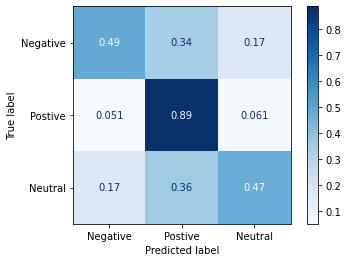

In [0]:
sgd_tf = SGDClassifier().fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(sgd_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(sgd_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(sgd_tf, open('sgd_tf_stem.sav', 'wb'))

display_results(sgd_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(sgd_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9848296443670729
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       757
           1       0.99      0.99      0.99      2663
           2       0.96      0.96      0.96       601

    accuracy                           0.98      4021
   macro avg       0.98      0.98      0.98      4021
weighted avg       0.98      0.98      0.98      4021



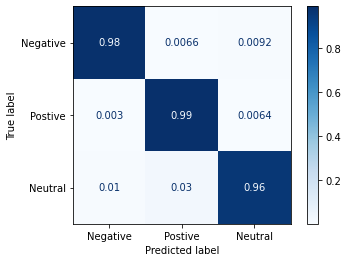

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7365805168986084
              precision    recall  f1-score   support

           0       0.57      0.42      0.48       189
           1       0.83      0.88      0.85       667
           2       0.47      0.51      0.49       150

    accuracy                           0.74      1006
   macro avg       0.62      0.60      0.61      1006
weighted avg       0.73      0.74      0.73      1006



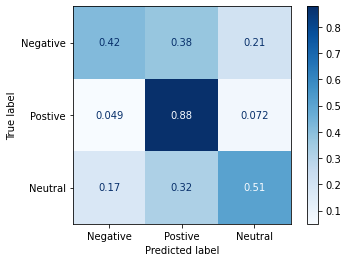

In [0]:
sgd_vec = SGDClassifier().fit(X_train_vec, y_train_norm)
y_pred_test = np.array(sgd_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(sgd_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(sgd_vec, open('sgd_vec_stem.sav', 'wb'))

display_results(sgd_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(sgd_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9726436209898035
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       757
           1       0.98      0.99      0.99      2663
           2       0.96      0.92      0.94       601

    accuracy                           0.97      4021
   macro avg       0.96      0.95      0.96      4021
weighted avg       0.97      0.97      0.97      4021



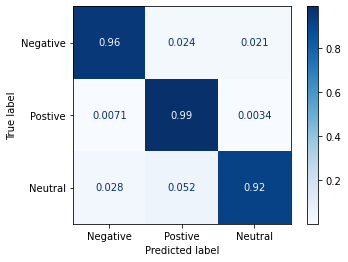

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.6958250497017893
              precision    recall  f1-score   support

           0       0.57      0.21      0.31       189
           1       0.72      0.94      0.81       667
           2       0.52      0.23      0.31       150

    accuracy                           0.70      1006
   macro avg       0.60      0.46      0.48      1006
weighted avg       0.66      0.70      0.65      1006



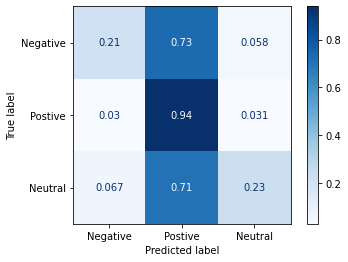

In [0]:
rf_tf = RandomForestClassifier(
n_estimators= 100, min_samples_split=2, max_features=2500
).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(rf_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(rf_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(knn_vec, open('rf_tf_stem.sav', 'wb'))

display_results(rf_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(rf_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.9798557572743098
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       757
           1       0.99      0.99      0.99      2663
           2       0.97      0.93      0.95       601

    accuracy                           0.98      4021
   macro avg       0.97      0.97      0.97      4021
weighted avg       0.98      0.98      0.98      4021



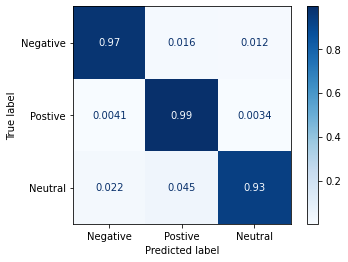

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.6789264413518886
              precision    recall  f1-score   support

           0       0.44      0.33      0.38       189
           1       0.74      0.88      0.80       667
           2       0.51      0.24      0.33       150

    accuracy                           0.68      1006
   macro avg       0.56      0.48      0.50      1006
weighted avg       0.65      0.68      0.65      1006



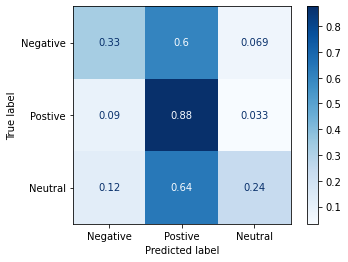

In [0]:
rf_vec = RandomForestClassifier(
    min_samples_split=2, n_estimators= 50
).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(rf_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(rf_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(knn_vec, open('rf_vec_stem.sav', 'wb'))

display_results(rf_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(rf_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.8470529718975379
              precision    recall  f1-score   support

           0       0.56      0.99      0.71       757
           1       0.99      0.98      0.99      2663
           2       0.89      0.06      0.12       601

    accuracy                           0.85      4021
   macro avg       0.81      0.68      0.61      4021
weighted avg       0.90      0.85      0.81      4021



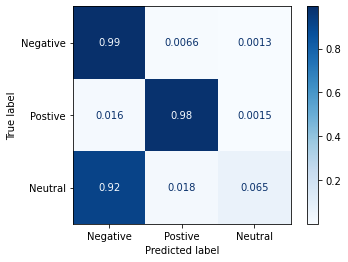

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.5178926441351889
              precision    recall  f1-score   support

           0       0.28      0.87      0.42       189
           1       0.91      0.49      0.63       667
           2       0.60      0.21      0.32       150

    accuracy                           0.52      1006
   macro avg       0.60      0.52      0.46      1006
weighted avg       0.74      0.52      0.55      1006



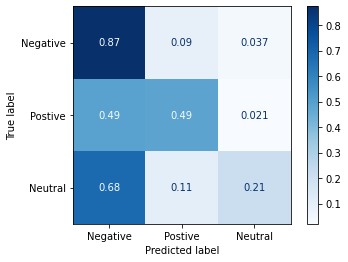

In [0]:
knn_tf = KNeighborsClassifier(n_neighbors=3).fit(X_train_tfidf, y_train_norm)
y_pred_test = np.array(knn_tf.predict(X_test_tfidf)).reshape(-1, 1)
y_pred_train = np.array(knn_tf.predict(X_train_tfidf)).reshape(-1, 1)
pickle.dump(knn_tf, open('knn_tf_stem.sav', 'wb'))
 
display_results(knn_tf, y_train_norm, y_pred_train, X_train_tfidf, y_train_norm, 'Training Set')
display_results(knn_tf, y_test_norm, y_pred_test, X_test_tfidf, y_test_norm, 'Testing Set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Training Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.7547067587701476
              precision    recall  f1-score   support

           0       0.63      0.90      0.75      2518
           1       0.87      0.83      0.85      2664
           2       0.87      0.49      0.63      2201

    accuracy                           0.75      7383
   macro avg       0.79      0.74      0.74      7383
weighted avg       0.79      0.75      0.75      7383



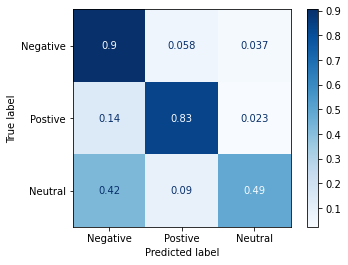

Testing Set
Labels: ['Negative', 'Postive', 'Neutral']
Accuracy: 0.5021668472372698
              precision    recall  f1-score   support

           0       0.43      0.79      0.55       630
           1       0.68      0.39      0.50       666
           2       0.56      0.31      0.40       550

    accuracy                           0.50      1846
   macro avg       0.56      0.50      0.48      1846
weighted avg       0.56      0.50      0.49      1846



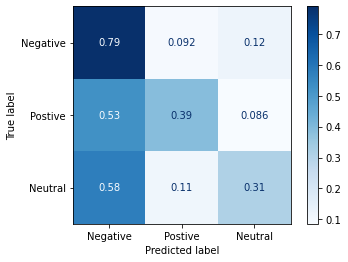

In [0]:
knn_vec = KNeighborsClassifier(n_neighbors=3).fit(X_train_vec, y_train_norm)
y_pred_test = np.array(knn_vec.predict(X_test_vec)).reshape(-1, 1)
y_pred_train = np.array(knn_vec.predict(X_train_vec)).reshape(-1, 1)
pickle.dump(knn_vec, open('knn_vec_stem.sav', 'wb'))

display_results(knn_vec, y_train_norm, y_pred_train, X_train_vec, y_train_norm, 'Training Set')
display_results(knn_vec, y_test_norm, y_pred_test, X_test_vec, y_test_norm, 'Testing Set')

In [0]:
# def build_model(model, use_tfidf=False):
#     if use_tfidf: 
#         steps = [
#           ('tfidf', TfidfVectorizer()),
#           ('spare_to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
#           ('clf', model)
#         ]    
#         model = Pipeline(steps)
#     else:
#         steps = [
#           ('Count', CountVectorizer()), 
#           ('spare_to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
#           ('clf', model)
#         ]
#         model = Pipeline(steps)
#     return model

### Lexicon

In [0]:
# helper func
def save_file(filename, file):
  import csv
  w = csv.writer(open(filename+".csv", "w"))
  for key, val in file.items():
    w.writerow([key, val])
  

In [0]:
# lexicon dict
def build_lex(data, n_gram=2, save=False):
  """
    data: tuple(pos_data, neg_data, neu_data) passed data is expected to be a list.
  """
  # assert n_gram >= 2, f'n_gram should be >1, passed {n_gram}'
  if not isinstance(data, tuple):
            raise ValueError('''Inappropriate type: {} for data whereas a tuple of (positive_data,
            negative_data, neutral_data) \
            is expected'''.format(type(data)))

  pos_data, neg_data, neu_data = data
  pos_grams = []
  for sentence in pos_data:
    sentence = sentence.split()
    pos_grams.append([sentence[i:i+n_gram] for i in range(len(sentence)-n_gram+1)])
  neg_grams = []
  for sentence in neg_data:
    sentence = sentence.split()
    neg_grams.append([sentence[i:i+n_gram] for i in range(len(sentence)-n_gram+1)])
  neu_grams = []
  for sentence in neu_data:
    sentence = sentence.split()
    neu_grams.append([sentence[i:i+n_gram] for i in range(len(sentence)-n_gram+1)])
  # flatting list of lists
  # reference: [https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists]
  from functools import reduce 
  pos_grams = reduce(lambda x,y: x+y, pos_grams)
  neg_grams = reduce(lambda x,y: x+y, neg_grams)
  neu_grams = reduce(lambda x,y: x+y, neu_grams)
  pos_grams_ = []
  for GRAMS in pos_grams:
    pos_grams_.append(' '.join(gram for gram in GRAMS))
  neg_grams_ = []
  for GRAMS in neg_grams:
    neg_grams_.append(' '.join(gram for gram in GRAMS))
  neu_grams_= []
  for GRAMS in neu_grams:
    neu_grams_.append(' '.join(gram for gram in GRAMS))
  # get likelihood of each word in pos,neg,neu.
  pos_dict, neg_dict, neu_dict = {}, {}, {}
  for pos_word in pos_grams_:
    if pos_word in pos_dict.keys():
      pos_dict[pos_word] += 1
    else:
      pos_dict[pos_word] = 1
  for neg_word in neg_grams_:
    if neg_word in neg_dict.keys():
      neg_dict[neg_word] += 1
    else:
      neg_dict[neg_word] = 1 
  for neu_word in neu_grams_:
      if neu_word in neu_dict.keys():
        neu_dict[neu_word] += 1
      else:
        neu_dict[neu_word] = 1

  pos_total = sum(pos_dict.values())
  pos_dict = {k: v / pos_total for k, v in pos_dict.items()}

  neg_total = sum(neg_dict.values())
  neg_dict = {k: v / neg_total for k, v in neg_dict.items()}

  neu_total = sum(neu_dict.values())
  neu_dict = {k: v / neu_total for k, v in neu_dict.items()}

  if save:
    save_file('postive', pos_dict)
    save_file('negative', neg_dict)
    save_file('neutral', neu_dict)
      
  return pos_dict, neg_dict, neu_dict

In [0]:
pos_data = utils.get_arabic_words(df[df.label == 1].text, handle_emojies='remove', remove_repeated_char=False, remove_punc=False)
neg_data = utils.get_arabic_words(df[df.label == 0].text, handle_emojies='remove', remove_repeated_char=False, remove_punc=False)
neu_data = utils.get_arabic_words(df[df.label == 2].text, handle_emojies='remove', remove_repeated_char=False, remove_punc=False)
pos_grams, neg_grams, neu_grams = build_lex(data=(pos_data, neg_data, neu_data), save=True)

In [0]:
# print(pos_grams)
# print()
# print(neg_grams)
# print()
# print(neu_grams)

In [0]:
# list(pos_gram.keys())[0]

'اجمل مكان'

In [0]:
def extract_lex(data, lexicon):
  """
  returns the text grams, postive words count, negative words count, neutral words count,
  """
  if not isinstance(lexicon, tuple):
            raise ValueError('Inappropriate type: {} for lexicon whereas a tuple of (pos_gram, neg_gram, neut_gram) \
            is expected'.format(type(lexicon)))
  pos_gram, neg_gram, neu_gram = lexicon
  from functools import reduce 
  N_GRAM = len(list(pos_gram.keys())[0].split())
  grams = []
  
  for index, sentence in enumerate(data):
    sentence = sentence.split()
    grams_ = [sentence[i:i+N_GRAM] for i in range(len(sentence)-N_GRAM+1)]
    grams__ = []
    for gram_list in grams_:
      grams__.append(' '.join(word for word in gram_list))
    # check for postive, negative words for each sentences.
    pos_count, neg_count, neut_count = 0, 0, 0
    for GRAM in grams__:
      try:
        pos_val = pos_gram[GRAM]
      except:
        pos_val = 0
      try:
        neg_val = neg_gram[GRAM]
      except:
        neg_val = 0
      try:
        neu_val = neg_gram[GRAM]
      except:
        neu_val = 0
      if neg_val > 0:
        print
      if (pos_val > neg_val) & (pos_val > neu_val):
        pos_count+=1
      elif (neg_val > pos_val) & (neg_val > neu_val):
        neg_count+=1
      else:
        neut_count+=1

    grams.append((grams__, pos_count, neg_count, neut_count))
  return grams

In [0]:
texts = utils.get_arabic_words(df.text, remove_punc=False, handle_emojies='remove', remove_repeated_char=False)

In [0]:
# merged.text[:2]

In [0]:
lex = extract_lex(texts, (pos_grams, neg_grams, neu_grams))

In [134]:
lex[:5]

[(['اروح ليلة', 'ليلة سهم'], 1, 0, 1),
 (['أصاااله ليلة', 'ليلة سهم'], 2, 0, 0),
 (['احلا مفاجأه',
   'مفاجأه صوتي',
   'صوتي راح',
   'راح وصلنا',
   'وصلنا احساسه',
   'احساسه موجود',
   'موجود خطاه',
   'خطاه السوء',
   'السوء مجيد',
   'مجيد فنان',
   'فنان يكرره',
   'يكرره الزمن',
   'الزمن اختصر',
   'اختصر الفن',
   'الفن والطرب',
   'والطرب شخص'],
  15,
  0,
  1),
 (['ليلة سهم',
   'سهم هالليله',
   'هالليله الطربيه',
   'الطربيه هالمتعه',
   'هالمتعه هالجمال',
   'هالجمال ؟',
   '؟ العبقري',
   'العبقري يستاهل',
   'يستاهل شغل',
   'شغل جبار',
   'جبار وجميل',
   'وجميل شكرا',
   'شكرا سهم',
   'سهم شكرا'],
  14,
  0,
  0),
 (['شابة اشتغل',
   'اشتغل مونتاج',
   'مونتاج مقاطع',
   'مقاطع وتصاميم',
   'وتصاميم وانفوجرافيك',
   'وانفوجرافيك وفلاتر',
   'وفلاتر وموشن',
   'وموشن جرافيك',
   'جرافيك مصدر',
   'مصدر رزقي',
   'رزقي م',
   'م راح',
   'راح يضركم',
   'يضركم د'],
  0,
  0,
  14)]

## Getting Experiemnatal Data

In [0]:
# !pip install getoldtweets3

In [0]:
!GetOldTweets3 --querysearch "واجهة الرياض" 

Saved 3700
Interrupted.


Done. Output file generated "output_got.csv".


In [0]:
!python clean.py --data_path /content/output_got.csv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Finished in 13.484740495681763


In [0]:
model_file = open('/content/lg_tf_stem.sav', 'rb')
loaded_model = pickle.load(model_file)

In [0]:
dat = pd.read_csv('/content/cleaned.csv')

In [0]:
dat.head()

,text
0,وحشتني واجهة الرياض
1,حزنت أحب واجهة الرياض مارحت لعمل ولترفيه فمنظر...
2,اتوقع الرياض وجدة لابد حظر كامل عليهم الخبر وا...
3,يلبس تيشرت اصفر فاقع وبنطلون اسود ويروح واجهة ...
4,تذوق الذة كيك العسل بطبقات الكنافة الذيذة الجب...


In [0]:
# helper func
def get_class(data):
  model_file = open('/content/lg_tf_stem.sav', 'rb')
  loaded_model = pickle.load(model_file)
  dat_transformed = tfidf.transform(data.text)
  dat_transformed = pca.transform(dat_transformed)
  pred = pd.DataFrame(loaded_model.predict_proba(dat_transformed), columns=['Negative', 'Postive', 'Neutral'])
  result = pd.merge(data,pred,how = 'left',left_index = True, right_index = True)
  return result

In [0]:
pred = get_class(dat)

In [0]:
# lex = lex_model(dat.text, lexicon=(pos_gram, neg_gram, neu_grams))

In [0]:
# lex[0]

[(['وحشتني واجهة', 'واجهة الرياض'], 0.0, 0.5, 0.5, 2, 'Neutral'), 2]